Spatial Data Science

Homework 6

Mariam Hovhannisyan

In [111]:
import networkx as nx                   
import matplotlib.pyplot as plt                                      
import collections                                                   
import numpy as np, pandas as pd, geopandas as gpd                    
from pylab import rcParams                                            
import re                                                           
from operator import itemgetter                                  
import seaborn as sns                                           
import matplotlib.colors as mcolors                                 
#import powerlaw                                                      
from itertools import combinations
import matplotlib.patches as mpatches

from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
                             # setting up the matplotlib and increase the resolution of the plots:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True)

1. Use the Rome_flows.csv file.  Creating a weighted networkx graph,compute the PageRank centralities. Plot the distribution of the PageRank values.
What is the main difference between the PageRank distribution of the street network you saw in this class and the distribution of mobility flow network PageRanks?

Plot the distributions next to each other and write 1-2 lines explaining the difference in simple words.

In [112]:
G = ox.graph_from_place("Gyumri, Armenia", network_type="drive")
G_proj = ox.project_graph(G)
# calculate PageRank centralities with a directed graph of G_proj (ie, no parallel edges)
pr = nx.pagerank(ox.get_digraph(G_proj))

In [6]:
rome = pd.read_csv('Rome_flows.csv', index_col=0, header=0)
rome.head()

,origins,destinations,flows
0,0,0,259
1,0,1,27
2,0,2,2
3,0,3,10
4,0,11,1


In [22]:
G1 = nx.Graph()
G1 = nx.from_pandas_edgelist(rome,source="origins", target="destinations", edge_attr='flows', create_using=nx.MultiDiGraph)
pr1 = nx.pagerank(ox.get_digraph(G1))

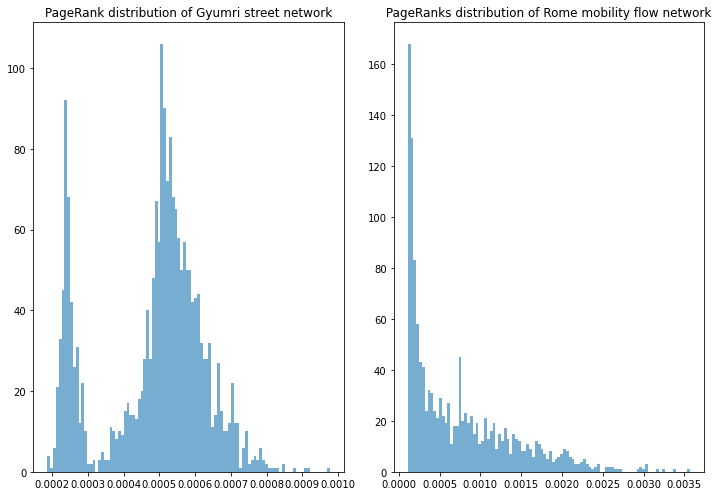

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7)) 
ax1.hist(pr.values(), bins=100, alpha=0.6)
ax2.hist(pr1.values(), bins=100, alpha=0.6)
ax1.set_title('PageRank distribution of Gyumri street network')
ax2.set_title(' PageRanks distribution of Rome mobility flow network ')
plt.tight_layout()
plt.show()

Plot the distributions next to each other and write 1-2 lines explaining the difference in simple words.

The street network of Gyumri shows, as noted during the class, pretty weird results, with a bunch of values having a high rank. I'll take the rist to draw a conclusion that it's because most of the streets have cross-roads hence connecting to up to 4 other streets.

In contrast, the flows in Rome result in right-skewed distribution of PageRank coefficient. There are a few flows of high popularity and most of them with low popularity. This is an efficient implementation of PageRank measure.

2. Plot an isochrone with walking distances of up to 30 minutes from the location with most GG taxi GPS points at 18:00-19:00 o'clock in Yerevan.

In [115]:
gps1 = pd.read_csv('Yerevan_gps_data.csv', header=0, index_col=1, nrows = 2*10**6 )

#keeping only the points inside the administrative union of Yerevan
gps = gps1.loc[(gps1.lon<= 44.632871)&(gps1.lat <= 40.253947) & 
              (gps1.lon >= 44.411555) & (gps1.lat >= 40.065685)]
#gps.reset_index(inplace = True)
gps.index= pd.to_datetime(gps.index)
gps1819 = gps[gps.index.hour.isin([18,19])]
gps1819

,Unnamed: 0,partnerId,lat,lon,status
createdAt,,,,,
2019-03-20 18:00:09,2536,12,40.205103,44.501612,1
2019-03-20 18:00:21,2537,12,40.205031,44.501703,1
2019-03-20 18:00:37,2538,12,40.204643,44.502047,1
2019-03-20 18:00:53,2539,12,40.204542,44.502078,1
2019-03-20 18:01:01,2540,12,40.204542,44.502078,1
...,...,...,...,...,...
2019-03-19 19:15:07,1999909,31939,40.213203,44.469552,0
2019-03-19 19:16:11,1999910,31939,40.213203,44.469552,0
2019-03-19 19:34:26,1999911,31939,40.213203,44.469552,0


In [92]:
print(gps1.size)
print(gps.size)

10000000
9892575


In [80]:
from pyproj import CRS
geometry = [Point(xy) for xy in zip(gps1819.lon, gps1819.lat)] 
gdf = gpd.GeoDataFrame(gps1819, crs=CRS.from_epsg(4326), geometry=geometry)
gdf.head()

,Unnamed: 0,partnerId,lat,lon,status,geometry
createdAt,,,,,,
2019-03-20 18:00:09,2536,12,40.205103,44.501612,1,POINT (44.50161 40.20510)
2019-03-20 18:00:21,2537,12,40.205031,44.501703,1,POINT (44.50170 40.20503)
2019-03-20 18:00:37,2538,12,40.204643,44.502047,1,POINT (44.50205 40.20464)
2019-03-20 18:00:53,2539,12,40.204542,44.502078,1,POINT (44.50208 40.20454)
2019-03-20 18:01:01,2540,12,40.204542,44.502078,1,POINT (44.50208 40.20454)


In [81]:
polyframe = gpd.read_file('Yerevan grid polygons/Yerevan_grid_polygons.shp')
print(polyframe.crs)
polyframe.head()

epsg:32638


,FID,geometry
0,0,"POLYGON ((451733.629 4443336.600, 451728.586 4..."
1,1,"POLYGON ((451609.763 4443603.633, 451609.763 4..."
2,2,"POLYGON ((451609.763 4444100.702, 451609.763 4..."
3,3,"POLYGON ((451609.763 4444597.770, 451609.763 4..."
4,4,"POLYGON ((451609.763 4445094.838, 451609.763 4..."


In [82]:
gdf.geometry = gdf.geometry.to_crs(polyframe.crs)

cells_taxicounts = gpd.sjoin(polyframe, gdf, op='contains')
taxicounts = cells_taxicounts.groupby(cells_taxicounts.index)['index_right'].count()
counts = pd.DataFrame(taxicounts)
counts.columns = ['counts']

In [83]:
polyframe['counts'] = counts.counts
polyframe['counts'].fillna(0, inplace=True)
polyframe['counts'] = polyframe['counts'].astype(int)
polyframe.head()
cell =polyframe[polyframe['counts']==polyframe['counts'].max()].geometry

In [84]:
cell.centroid

427    POINT (458707.305 4448325.783)
dtype: geometry

In [85]:
G = ox.graph_from_place("Yerevan, Armenia", network_type="walk")
G_proj = ox.project_graph(G)

center_node = ox.distance.nearest_nodes(G, cell.centroid.x, cell.centroid.y)
center_node

[2762265297]

In [86]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

gdf_nodes[gdf_nodes.index ==2762265297 ]

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
2762265297,40.241833,44.429348,3,NaN,NaN,POINT (44.42935 40.24183)


In [87]:
trip_times = [5, 10, 15, 20, 25, 30]  # in minutes
travel_speed = 4.5  # walking speed in km/hour

meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G_proj.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute
    
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="viridis", start=0, return_hex=True)
print(iso_colors)

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']


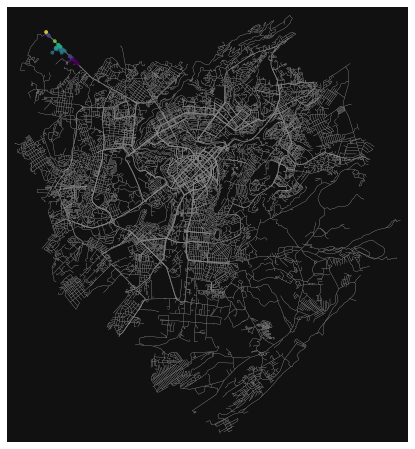

In [107]:
node_colors = {}

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G_proj, center_node[0], center = center_node[0],radius=trip_time, distance="time")
    
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G_proj.nodes()]
ns = [15 if node in node_colors else 0 for node in G_proj.nodes()]
fig, ax = plt.subplots(figsize=(40,26))
fig, ax = ox.plot_graph(
    G_proj,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

for the time interval 6-7pm, the results show that most of the GGtaxis are in the beginning of the Ashtarak Highway, near Vahagni and Proshyan. Maybe, at this time there are a lot of cars leaving and entering the city, and since it's a highway we do not get logical area to measure the walking distance.